In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from tqdm import tqdm

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

import gensim
import spacy 
import logging
import warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


import pickle
import spacy
import ast

import pyLDAvis
import pyLDAvis.gensim  
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)



%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

[nltk_data] Downloading package stopwords to C:\Users\Devdatta
[nltk_data]     Supnekar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Devdatta
[nltk_data]     Supnekar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Anaconda\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [5]:
df = pd.read_csv("bbc-text.csv")
# df2 = pd.read_csv("1st_Input_df_for_tm.csv")
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [6]:
df.shape

(2225, 2)

In [7]:
text = df["text"].values.tolist()

In [11]:
text_step1 = []

for i in range(0, len(text)):
    review = re.sub("\d+", "", str(text[i]))
    text_step1.append(review)
text = text_step1  # re-assigning
del text_step1

In [14]:
text_step2 = []

for i in range(0, len(text)):
    review = re.sub(r"\W", " ", str(text[i]))
    review = review.lower()
    review = re.sub(r"\s+[a-z]\s+", " ", review)
    review = re.sub(r"^[a-z]\s+", " ", review)
    review = re.sub(r"\d+", " ", review)
    review = re.sub(r"\s+", " ", review)
    text_step2.append(review)

text = text_step2  # re-assigning
del text_step2

In [16]:
text[0]

'tv future in the hands of viewers with home theatre systems plasma high definition tvs and digital video recorders moving into the living room the way people watch tv will be radically different in five years time that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes with the us leading the trend programmes and other content will be delivered to viewers via home networks through cable satellite telecoms companies and broadband service providers to front rooms and portable devices one of the most talked about technologies of ces has been digital and personal video recorders dvr and pvr these set top boxes like the us tivo and the uk sky system allow people to record store play pause and forward wind tv programmes when they want essentially the technology allows for much more personalised tv they are also being built in to high definition tv sets which are b

In [17]:
text_step3 = []

for i in text:
    review = gensim.utils.simple_preprocess(str(i), deacc=True)
    text_step3.append(review)

text = text_step3
del text_step3

In [18]:
text[0]

['tv',
 'future',
 'in',
 'the',
 'hands',
 'of',
 'viewers',
 'with',
 'home',
 'theatre',
 'systems',
 'plasma',
 'high',
 'definition',
 'tvs',
 'and',
 'digital',
 'video',
 'recorders',
 'moving',
 'into',
 'the',
 'living',
 'room',
 'the',
 'way',
 'people',
 'watch',
 'tv',
 'will',
 'be',
 'radically',
 'different',
 'in',
 'five',
 'years',
 'time',
 'that',
 'is',
 'according',
 'to',
 'an',
 'expert',
 'panel',
 'which',
 'gathered',
 'at',
 'the',
 'annual',
 'consumer',
 'electronics',
 'show',
 'in',
 'las',
 'vegas',
 'to',
 'discuss',
 'how',
 'these',
 'new',
 'technologies',
 'will',
 'impact',
 'one',
 'of',
 'our',
 'favourite',
 'pastimes',
 'with',
 'the',
 'us',
 'leading',
 'the',
 'trend',
 'programmes',
 'and',
 'other',
 'content',
 'will',
 'be',
 'delivered',
 'to',
 'viewers',
 'via',
 'home',
 'networks',
 'through',
 'cable',
 'satellite',
 'telecoms',
 'companies',
 'and',
 'broadband',
 'service',
 'providers',
 'to',
 'front',
 'rooms',
 'and',
 'por

In [20]:
stop_words = stopwords.words('english')
file = open("stopwords/extended_stopwords.txt", "r")
stop_words.extend([line.strip() for line in file.readlines()])
file.close()
file = open("stopwords/contractions.txt", "r")
contractions = ast.literal_eval(file.read())
file.close()

In [21]:
text_step4 = []

for i in text:
    ii = []
    for word in i:
        if word not in stop_words:
            ii.append(word)
    text_step4.append(ii)

text = text_step4
del text_step4

In [22]:
text[0]

['tv',
 'future',
 'hands',
 'viewers',
 'theatre',
 'systems',
 'plasma',
 'high',
 'definition',
 'tvs',
 'digital',
 'video',
 'recorders',
 'moving',
 'living',
 'room',
 'people',
 'watch',
 'tv',
 'radically',
 'years',
 'time',
 'expert',
 'panel',
 'gathered',
 'annual',
 'consumer',
 'electronics',
 'las',
 'vegas',
 'discuss',
 'technologies',
 'impact',
 'favourite',
 'pastimes',
 'leading',
 'trend',
 'programmes',
 'content',
 'delivered',
 'viewers',
 'networks',
 'cable',
 'satellite',
 'telecoms',
 'companies',
 'broadband',
 'service',
 'providers',
 'front',
 'rooms',
 'portable',
 'devices',
 'talked',
 'technologies',
 'ces',
 'digital',
 'personal',
 'video',
 'recorders',
 'dvr',
 'pvr',
 'set',
 'top',
 'boxes',
 'tivo',
 'uk',
 'sky',
 'system',
 'people',
 'record',
 'store',
 'play',
 'pause',
 'forward',
 'wind',
 'tv',
 'programmes',
 'essentially',
 'technology',
 'personalised',
 'tv',
 'built',
 'high',
 'definition',
 'tv',
 'sets',
 'big',
 'business',


In [23]:
bigram = gensim.models.Phrases(text, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [24]:
text_step5 = []

for i in text:
    text_step5.append(bigram_mod[i])

text = text_step5
del text_step5

In [25]:
text[0]

['tv',
 'future',
 'hands',
 'viewers',
 'theatre',
 'systems',
 'plasma',
 'high_definition',
 'tvs',
 'digital',
 'video_recorders',
 'moving',
 'living_room',
 'people',
 'watch',
 'tv',
 'radically',
 'years',
 'time',
 'expert',
 'panel',
 'gathered',
 'annual',
 'consumer_electronics',
 'las_vegas',
 'discuss',
 'technologies',
 'impact',
 'favourite',
 'pastimes',
 'leading',
 'trend',
 'programmes',
 'content',
 'delivered',
 'viewers',
 'networks',
 'cable',
 'satellite',
 'telecoms',
 'companies',
 'broadband',
 'service_providers',
 'front',
 'rooms',
 'portable_devices',
 'talked',
 'technologies',
 'ces',
 'digital',
 'personal',
 'video_recorders',
 'dvr',
 'pvr',
 'set',
 'top_boxes',
 'tivo',
 'uk',
 'sky',
 'system',
 'people',
 'record',
 'store',
 'play',
 'pause',
 'forward',
 'wind',
 'tv',
 'programmes',
 'essentially',
 'technology',
 'personalised',
 'tv',
 'built',
 'high_definition',
 'tv',
 'sets',
 'big',
 'business',
 'japan',
 'slower',
 'europe',
 'lack',

In [26]:
trigram = gensim.models.Phrases(bigram[text], threshold=100)
trigram_mod = gensim.models.phrases.Phraser(trigram)

text_step6 = []

for i in text:
    text_step6.append(trigram_mod[bigram_mod[i]])

text = text_step6
del text_step6

In [28]:
text[0]

['tv',
 'future',
 'hands',
 'viewers',
 'theatre',
 'systems',
 'plasma',
 'high_definition_tvs',
 'digital_video_recorders',
 'moving',
 'living_room',
 'people',
 'watch',
 'tv',
 'radically',
 'years',
 'time',
 'expert',
 'panel',
 'gathered',
 'annual',
 'consumer_electronics',
 'las_vegas',
 'discuss',
 'technologies',
 'impact',
 'favourite',
 'pastimes',
 'leading',
 'trend',
 'programmes',
 'content',
 'delivered',
 'viewers',
 'networks',
 'cable',
 'satellite',
 'telecoms',
 'companies',
 'broadband',
 'service_providers',
 'front',
 'rooms',
 'portable_devices',
 'talked',
 'technologies',
 'ces',
 'digital',
 'personal_video_recorders',
 'dvr',
 'pvr',
 'set_top_boxes',
 'tivo',
 'uk',
 'sky',
 'system',
 'people',
 'record',
 'store',
 'play',
 'pause',
 'forward',
 'wind',
 'tv',
 'programmes',
 'essentially',
 'technology',
 'personalised',
 'tv',
 'built',
 'high_definition',
 'tv',
 'sets',
 'big',
 'business',
 'japan',
 'slower',
 'europe',
 'lack',
 'high_definiti

In [29]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
nlp.max_length = (
    3000000  # increasing text length to 3000000 from default of 1000000
)
allowed_postags = ["NOUN", "ADJ", "VERB", "ADV"]

text_step7 = []

for i in text:
    doc = nlp(" ".join(i))
    text_step7.append(
        [token.lemma_ for token in doc if token.pos_ in allowed_postags]
    )

text = text_step7
del text_step7

In [30]:
text[0]

['tv',
 'future',
 'hand',
 'viewer',
 'theatre',
 'system',
 'plasma',
 'high_definition_tvs',
 'digital_video_recorder',
 'move',
 'living_room',
 'people',
 'watch',
 'tv',
 'radically',
 'year',
 'time',
 'expert',
 'panel',
 'gather',
 'annual',
 'consumer_electronic',
 'las_vega',
 'discuss',
 'technology',
 'impact',
 'favourite',
 'pastime',
 'lead',
 'trend',
 'programme',
 'content',
 'deliver',
 'viewer',
 'network',
 'cable',
 'satellite',
 'telecom',
 'company',
 'broadband',
 'front',
 'room',
 'portable_device',
 'talk',
 'technology',
 'ces',
 'digital',
 'dvr',
 'pvr',
 'set_top_boxe',
 'tivo',
 'uk',
 'sky',
 'system',
 'people',
 'record',
 'store',
 'play',
 'pause',
 'forward',
 'wind',
 'tv',
 'programme',
 'essentially',
 'technology',
 'personalise',
 'tv',
 'build',
 'tv',
 'set',
 'big',
 'business',
 'japan',
 'slow',
 'europe',
 'lack',
 'high_definition',
 'programming',
 'people',
 'forward',
 'wind',
 'advert',
 'forget',
 'abide',
 'network',
 'channel',

In [31]:
text_step8 = []

for i in text:
    ii = []
    for word in i:
        if word not in stop_words:
            ii.append(word)
    text_step8.append(ii)

text = text_step8
del text_step8

In [32]:
text[0] 

['tv',
 'future',
 'hand',
 'viewer',
 'theatre',
 'system',
 'plasma',
 'high_definition_tvs',
 'digital_video_recorder',
 'move',
 'living_room',
 'people',
 'watch',
 'tv',
 'radically',
 'year',
 'time',
 'expert',
 'panel',
 'gather',
 'annual',
 'consumer_electronic',
 'las_vega',
 'discuss',
 'technology',
 'impact',
 'favourite',
 'pastime',
 'lead',
 'trend',
 'programme',
 'content',
 'deliver',
 'viewer',
 'network',
 'cable',
 'satellite',
 'telecom',
 'company',
 'broadband',
 'front',
 'room',
 'portable_device',
 'talk',
 'technology',
 'ces',
 'digital',
 'dvr',
 'pvr',
 'set_top_boxe',
 'tivo',
 'uk',
 'sky',
 'system',
 'people',
 'record',
 'store',
 'play',
 'pause',
 'forward',
 'wind',
 'tv',
 'programme',
 'essentially',
 'technology',
 'personalise',
 'tv',
 'build',
 'tv',
 'set',
 'big',
 'business',
 'japan',
 'slow',
 'europe',
 'lack',
 'high_definition',
 'programming',
 'people',
 'forward',
 'wind',
 'advert',
 'forget',
 'abide',
 'network',
 'channel',

In [33]:
id2word = corpora.Dictionary(text)
corpus = []
for i in text:
    d = id2word.doc2bow(i)
    corpus.append(d)

In [34]:
text_join = []

for i in text:
    word = " ".join(i)
    text_join.append(word)

df["clean"] = text_join

In [35]:
df.head()

,category,text,clean
0,tech,tv future in the hands of viewers with home th...,tv future hand viewer theatre system plasma hi...
1,business,worldcom boss left books alone former worldc...,worldcom boss leave book worldcom ebber accuse...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester rush bid a...
3,sport,yeading face newcastle in fa cup premiership s...,yeade face newcastle premiership side newcastl...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean_twelve raid box_office ocean_twelve crim...


In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
# frequency
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer()
    
    bag_of_words = vec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [
        (word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()
    ]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


In [42]:
common_words = get_top_n_words(df["clean"], n=100)

In [44]:
common_words

[('year', 3161),
 ('people', 2046),
 ('time', 1613),
 ('game', 1497),
 ('government', 1196),
 ('film', 1166),
 ('play', 1135),
 ('company', 1114),
 ('work', 1047),
 ('firm', 992),
 ('win', 930),
 ('number', 888),
 ('set', 850),
 ('include', 850),
 ('music', 839),
 ('player', 833),
 ('plan', 804),
 ('labour', 799),
 ('service', 793),
 ('week', 787),
 ('country', 771),
 ('report', 767),
 ('big', 763),
 ('call', 743),
 ('day', 726),
 ('market', 725),
 ('party', 718),
 ('good', 704),
 ('expect', 691),
 ('technology', 677),
 ('sale', 677),
 ('start', 637),
 ('rise', 634),
 ('group', 621),
 ('england', 618),
 ('claim', 608),
 ('lead', 607),
 ('offer', 599),
 ('move', 598),
 ('uk', 591),
 ('early', 579),
 ('high', 575),
 ('share', 570),
 ('award', 569),
 ('top', 565),
 ('record', 549),
 ('hold', 549),
 ('issue', 543),
 ('star', 533),
 ('british', 533),
 ('deal', 531),
 ('public', 527),
 ('tv', 525),
 ('increase', 516),
 ('face', 507),
 ('pay', 504),
 ('election', 499),
 ('business', 493),
 ('

In [46]:
df2 = pd.DataFrame(common_words, columns=["Text", "count"])

In [48]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [49]:
df3 = (
                        df2.groupby("Text")
                        .sum()["count"]
                        .sort_values(ascending=False)
                        .iplot(
                            kind="bar",
                            yTitle="Count",
                            linecolor="black",
                            title="Top 100 words after removing stop words",
                            asFigure=True # plotly obj needs to be returned for streamlit to interpret
                        )
                    )

In [51]:
df3

In [53]:
#bigram
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_bigram(corpus, n=None):
    
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [
        (word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()
    ]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [62]:
common_words = get_top_n_bigram(df["clean"], 100)
df3 = pd.DataFrame(common_words, columns=["Text", "count"])

In [63]:
df3

,Text,count
0,labour party,78
1,video game,69
2,public service,67
3,early year,61
4,digital music,61
5,young people,58
6,music player,57
7,time year,55
8,half time,53
9,year year,49


In [60]:
df3 = (
                        df3.groupby("Text")
                        .sum()["count"]
                        .sort_values(ascending=False)
                        .iplot(
                            kind="bar",
                            yTitle="Count",
                            linecolor="black",
                            title="Top 100 bigrams after removing stop words",
                            asFigure=True # plotly obj needs to be returned for streamlit to interpret
                        )
                    )

In [61]:
df3

In [5]:
# chekc duplicates 
df.duplicated().sum()

99

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(2126, 2)

In [9]:
stop_words = stopwords.words('english')
file = open("stopwords/extended_stopwords.txt", "r")
stop_words.extend([line.strip() for line in file.readlines()])
file.close()
file = open("stopwords/contractions.txt", "r")
contractions = ast.literal_eval(file.read())
file.close()

In [10]:
print(df.category.unique())

['tech' 'business' 'sport' 'entertainment' 'politics']


In [11]:
# Convert to list
data = df.text.values.tolist()
print(len(data))

2126


In [12]:

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'"," ", sent) for sent in data]

pprint(data[0])

('tv future in the hands of viewers with home theatre systems plasma '
 'high-definition tvs and digital video recorders moving into the living room '
 'the way people watch tv will be radically different in five years time. that '
 'is according to an expert panel which gathered at the annual consumer '
 'electronics show in las vegas to discuss how these new technologies will '
 'impact one of our favourite pastimes. with the us leading the trend '
 'programmes and other content will be delivered to viewers via home networks '
 'through cable satellite telecoms companies and broadband service providers '
 'to front rooms and portable devices. one of the most talked-about '
 'technologies of ces has been digital and personal video recorders (dvr and '
 'pvr). these set-top boxes like the us s tivo and the uk s sky+ system allow '
 'people to record store play pause and forward wind tv programmes when they '
 'want. essentially the technology allows for much more personalised tv. they 

In [13]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence).encode('utf-8'), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))
print(data_words[0])


['tv', 'future', 'in', 'the', 'hands', 'of', 'viewers', 'with', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'and', 'digital', 'video', 'recorders', 'moving', 'into', 'the', 'living', 'room', 'the', 'way', 'people', 'watch', 'tv', 'will', 'be', 'radically', 'different', 'in', 'five', 'years', 'time', 'that', 'is', 'according', 'to', 'an', 'expert', 'panel', 'which', 'gathered', 'at', 'the', 'annual', 'consumer', 'electronics', 'show', 'in', 'las', 'vegas', 'to', 'discuss', 'how', 'these', 'new', 'technologies', 'will', 'impact', 'one', 'of', 'our', 'favourite', 'pastimes', 'with', 'the', 'us', 'leading', 'the', 'trend', 'programmes', 'and', 'other', 'content', 'will', 'be', 'delivered', 'to', 'viewers', 'via', 'home', 'networks', 'through', 'cable', 'satellite', 'telecoms', 'companies', 'and', 'broadband', 'service', 'providers', 'to', 'front', 'rooms', 'and', 'portable', 'devices', 'one', 'of', 'the', 'most', 'talked', 'about', 'technologies', 'of', 'ces', 'has

In [14]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)# higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

In [15]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [16]:
# See bigram example
print(bigram_mod[data_words[0]])


['tv', 'future', 'in', 'the', 'hands', 'of', 'viewers', 'with', 'home', 'theatre', 'systems', 'plasma', 'high_definition', 'tvs', 'and', 'digital', 'video_recorders', 'moving', 'into', 'the', 'living_room', 'the', 'way', 'people', 'watch', 'tv', 'will', 'be', 'radically', 'different', 'in', 'five', 'years', 'time', 'that', 'is', 'according', 'to', 'an', 'expert', 'panel', 'which', 'gathered', 'at', 'the', 'annual', 'consumer_electronics', 'show', 'in', 'las_vegas', 'to', 'discuss', 'how', 'these', 'new', 'technologies', 'will', 'impact', 'one', 'of', 'our', 'favourite', 'pastimes', 'with', 'the', 'us', 'leading', 'the', 'trend', 'programmes', 'and', 'other', 'content', 'will', 'be', 'delivered', 'to', 'viewers', 'via', 'home', 'networks', 'through', 'cable', 'satellite', 'telecoms', 'companies', 'and', 'broadband', 'service_providers', 'to', 'front', 'rooms', 'and', 'portable_devices', 'one', 'of', 'the', 'most', 'talked', 'about', 'technologies', 'of', 'ces', 'has', 'been', 'digital',

In [17]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [18]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [19]:
print(len(data_lemmatized))

2126


In [20]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 2), (7, 2), (8, 1), (9, 1), (10, 1), (11, 7), (12, 2), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 2), (19, 1), (20, 2), (21, 1), (22, 2), (23, 1), (24, 5), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 3), (31, 1), (32, 1), (33, 1), (34, 1), (35, 4), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 4), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 2), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 2), (72, 3), (73, 1), (74, 1), (75, 3), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 3), (93, 1), (94, 2), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 2), (101, 1), (102, 1), (103, 1), (104, 1), (105, 2), (106, 2), (107, 1), (108, 1), (109, 1), (110, 5),

In [26]:
len(corpus)

2126

In [27]:
id2word[0]

'abide'

In [28]:
len(id2word)

22367

In [29]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abide', 1),
  ('adam', 1),
  ('advert', 1),
  ('advertising', 2),
  ('announce', 1),
  ('annual', 1),
  ('bbc', 2),
  ('big', 2),
  ('bill_gate', 1),
  ('book', 1),
  ('box', 1),
  ('brand', 7),
  ('broadband', 2),
  ('broadcast', 1),
  ('broadcaster', 1),
  ('build', 2),
  ('business', 1),
  ('button', 1),
  ('cable', 2),
  ('call', 1),
  ('capability', 2),
  ('carte', 1),
  ('ce', 2),
  ('challenge', 1),
  ('channel', 5),
  ('chief', 1),
  ('choice', 2),
  ('comfortable', 1),
  ('commercial', 1),
  ('communication', 1),
  ('company', 3),
  ('concern', 1),
  ('connection', 1),
  ('consumer', 1),
  ('consumer_electronic', 1),
  ('content', 4),
  ('control', 1),
  ('crystal', 1),
  ('deliver', 1),
  ('device', 1),
  ('diaper', 1),
  ('digital', 2),
  ('directtv', 1),
  ('discuss', 1),
  ('display', 1),
  ('dvd', 1),
  ('dvr', 4),
  ('enhance', 1),
  ('entertainment', 1),
  ('essentially', 1),
  ('europe', 2),
  ('experience', 1),
  ('expert', 1),
  ('external', 1),
  ('familiar', 1)

In [32]:
def tune_model(dictionary, corpus, texts, limit, start=2, step=1):
    
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(round(coherencemodel.get_coherence(),3))

    return model_list, coherence_values

In [33]:
# Can take a long time to run
model_list, coherence_values = tune_model(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=8, step=1)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [04:13<00:00, 42.27s/it]


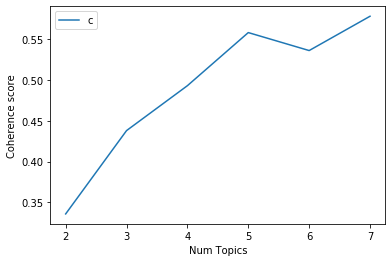

In [35]:
# Show graph
limit=8; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [36]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.336
Num Topics = 3  has Coherence Value of 0.438
Num Topics = 4  has Coherence Value of 0.493
Num Topics = 5  has Coherence Value of 0.558
Num Topics = 6  has Coherence Value of 0.536
Num Topics = 7  has Coherence Value of 0.578


In [37]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.017*"film" + 0.012*"year" + 0.010*"award" + 0.008*"star" + 0.007*"music" '
  '+ 0.006*"include" + 0.005*"british" + 0.005*"top" + 0.005*"director" + '
  '0.005*"album"'),
 (1,
  '0.015*"people" + 0.010*"game" + 0.009*"technology" + 0.007*"mobile" + '
  '0.007*"network" + 0.007*"phone" + 0.006*"user" + 0.006*"digital" + '
  '0.006*"computer" + 0.006*"tv"'),
 (2,
  '0.014*"game" + 0.012*"play" + 0.010*"win" + 0.010*"player" + 0.009*"time" + '
  '0.008*"year" + 0.008*"england" + 0.007*"match" + 0.006*"team" + '
  '0.006*"club"'),
 (3,
  '0.009*"government" + 0.008*"people" + 0.007*"labour" + 0.007*"party" + '
  '0.006*"plan" + 0.005*"tell" + 0.005*"issue" + 0.004*"election" + '
  '0.004*"blair" + 0.004*"country"'),
 (4,
  '0.018*"year" + 0.013*"sale" + 0.012*"rise" + 0.011*"company" + 0.008*"bank" '
  '+ 0.008*"market" + 0.008*"expect" + 0.008*"share" + 0.007*"firm" + '
  '0.007*"fall"')]


In [38]:
x = optimal_model.show_topics(num_topics=5, num_words=10, formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

# Below Code Prints Topics and Words
for topic, words in topics_words:
    print(str(topic) + "::" + str(words))
print()

print("---------------------")

0::['film', 'year', 'award', 'star', 'music', 'include', 'british', 'top', 'director', 'album']
1::['people', 'game', 'technology', 'mobile', 'network', 'phone', 'user', 'digital', 'computer', 'tv']
2::['game', 'play', 'win', 'player', 'time', 'year', 'england', 'match', 'team', 'club']
3::['government', 'people', 'labour', 'party', 'plan', 'tell', 'issue', 'election', 'blair', 'country']
4::['year', 'sale', 'rise', 'company', 'bank', 'market', 'expect', 'share', 'firm', 'fall']

---------------------


In [39]:
len(optimal_model[corpus])

2126

In [40]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        
        row = sorted(row[0], key=lambda x: x[1], reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
#     sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df["Text"] = contents 
    return sent_topics_df


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)
df_topic_sents_keywords.head(5)

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,1.0,0.8592,"people, game, technology, mobile, network, pho...",tv future in the hands of viewers with home th...
1,3.0,0.7530,"government, people, labour, party, plan, tell,...",worldcom boss left books alone former worldcom...
2,2.0,0.8211,"game, play, win, player, time, year, england, ...",tigers wary of farrell gamble leicester say th...
3,2.0,0.9236,"game, play, win, player, time, year, england, ...",yeading face newcastle in fa cup premiership s...
4,0.0,0.8015,"film, year, award, star, music, include, briti...",ocean s twelve raids box office ocean s twelve...


In [95]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic_No', 'Topic_Perc_Contrib', 'Topic_Keywords', 'Text']

final_df = df_dominant_topic.drop("Document_No", axis=1)

# add clean text Show
clean_text = [ " ".join(i) for i in texts]
final_df["Clean_Text"] = clean_text

# show
final_df.head(15)

,Dominant_Topic_No,Topic_Perc_Contrib,Topic_Keywords,Text,Clean_Text
0,1.0,0.8592,"people, game, technology, mobile, network, pho...",tv future in the hands of viewers with home th...,tv future hand viewer theatre system plasma tv...
1,3.0,0.7530,"government, people, labour, party, plan, tell,...",worldcom boss left books alone former worldcom...,worldcom boss leave book worldcom ebber accuse...
2,2.0,0.8211,"game, play, win, player, time, year, england, ...",tigers wary of farrell gamble leicester say th...,tiger wary farrell gamble leicester rush make ...
3,2.0,0.9236,"game, play, win, player, time, year, england, ...",yeading face newcastle in fa cup premiership s...,yeade face newcastle premiership side newcastl...
4,0.0,0.8015,"film, year, award, star, music, include, briti...",ocean s twelve raids box office ocean s twelve...,ocean raid ocean crime caper sequel star georg...
5,3.0,0.8146,"government, people, labour, party, plan, tell,...",howard hits back at mongrel jibe michael howar...,howard hit mongrel jibe claim tory_leader acti...
6,3.0,0.8938,"government, people, labour, party, plan, tell,...",blair prepares to name poll date tony blair is...,blair prepare poll tony_blair election day par...
7,2.0,0.7705,"game, play, win, player, time, year, england, ...",henman hopes ended in dubai third seed tim hen...,henman hope end dubai seed tim_henman slump st...
8,2.0,0.9085,"game, play, win, player, time, year, england, ...",wilkinson fit to face edinburgh england captai...,wilkinson fit face edinburgh england captain l...
9,0.0,0.8034,"film, year, award, star, music, include, briti...",last star wars not for children the sixth and ...,star_war child sixth final star_war movie suit...


In [96]:
lab = {0.0:"Topic1",1.0:"Topic2",2.0:"Topic3",3.0:"Topic4",4.0:"Topic5"}
final_df["Topic"] = final_df["Dominant_Topic_No"].map(lab)
final_df.head(5)

,Dominant_Topic_No,Topic_Perc_Contrib,Topic_Keywords,Text,Clean_Text,Topic
0,1.0,0.8592,"people, game, technology, mobile, network, pho...",tv future in the hands of viewers with home th...,tv future hand viewer theatre system plasma tv...,Topic2
1,3.0,0.7530,"government, people, labour, party, plan, tell,...",worldcom boss left books alone former worldcom...,worldcom boss leave book worldcom ebber accuse...,Topic4
2,2.0,0.8211,"game, play, win, player, time, year, england, ...",tigers wary of farrell gamble leicester say th...,tiger wary farrell gamble leicester rush make ...,Topic3
3,2.0,0.9236,"game, play, win, player, time, year, england, ...",yeading face newcastle in fa cup premiership s...,yeade face newcastle premiership side newcastl...,Topic3
4,0.0,0.8015,"film, year, award, star, music, include, briti...",ocean s twelve raids box office ocean s twelve...,ocean raid ocean crime caper sequel star georg...,Topic1


In [97]:
final_df["Topic"].value_counts()

Topic4    591
Topic3    472
Topic1    378
Topic5    355
Topic2    330
Name: Topic, dtype: int64

In [121]:
final_df.columns
df_dominant_topic = final_df.copy()

### Most Representative Sentence for Each Topic 

In [120]:
sent_topics_sorted = pd.DataFrame()
sent_topics_outdf_grpd = final_df.groupby('Dominant_Topic_No')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorted = pd.concat([sent_topics_sorted, 
                                             grp.sort_values(['Topic_Perc_Contrib'], ascending=False).head(5)], 
                                            axis=0)

# Reset Index    
sent_topics_sorted.reset_index(drop=True, inplace=True)
sent_topics_sorted = sent_topics_sorted[["Topic","Topic_Perc_Contrib","Topic_Keywords","Text"]]

# Show
sent_topics_sorted

,Topic,Topic_Perc_Contrib,Topic_Keywords,Text
0,Topic1,0.9925,"film, year, award, star, music, include, briti...",stars gear up for bafta ceremony film stars fr...
1,Topic1,0.9881,"film, year, award, star, music, include, briti...",oscar nominees gear up for lunch leonardo dica...
2,Topic1,0.9814,"film, year, award, star, music, include, briti...",spirit awards hail sideways the comedy sideway...
3,Topic1,0.9813,"film, year, award, star, music, include, briti...",sideways dominates spirit awards the comedy si...
4,Topic1,0.9753,"film, year, award, star, music, include, briti...",us critics laud comedy sideways road trip come...
5,Topic2,0.9911,"people, game, technology, mobile, network, pho...",fast moving phone bugs appear security firms a...
6,Topic2,0.9911,"people, game, technology, mobile, network, pho...",fast moving phone viruses appear security firm...
7,Topic2,0.9722,"people, game, technology, mobile, network, pho...",microsoft debuts security tools microsoft is r...
8,Topic2,0.9662,"people, game, technology, mobile, network, pho...",mobiles not media players yet mobiles are not ...
9,Topic2,0.9640,"people, game, technology, mobile, network, pho...",microsoft releases bumper patches microsoft ha...


### Frequency Distribution of Word Counts in Documents

In [125]:
df_dominant_topic.head()

,Dominant_Topic_No,Topic_Perc_Contrib,Topic_Keywords,Text,Clean_Text,Topic
0,1.0,0.8592,"people, game, technology, mobile, network, pho...",tv future in the hands of viewers with home th...,tv future hand viewer theatre system plasma tv...,Topic2
1,3.0,0.7530,"government, people, labour, party, plan, tell,...",worldcom boss left books alone former worldcom...,worldcom boss leave book worldcom ebber accuse...,Topic4
2,2.0,0.8211,"game, play, win, player, time, year, england, ...",tigers wary of farrell gamble leicester say th...,tiger wary farrell gamble leicester rush make ...,Topic3
3,2.0,0.9236,"game, play, win, player, time, year, england, ...",yeading face newcastle in fa cup premiership s...,yeade face newcastle premiership side newcastl...,Topic3
4,0.0,0.8015,"film, year, award, star, music, include, briti...",ocean s twelve raids box office ocean s twelve...,ocean raid ocean crime caper sequel star georg...,Topic1


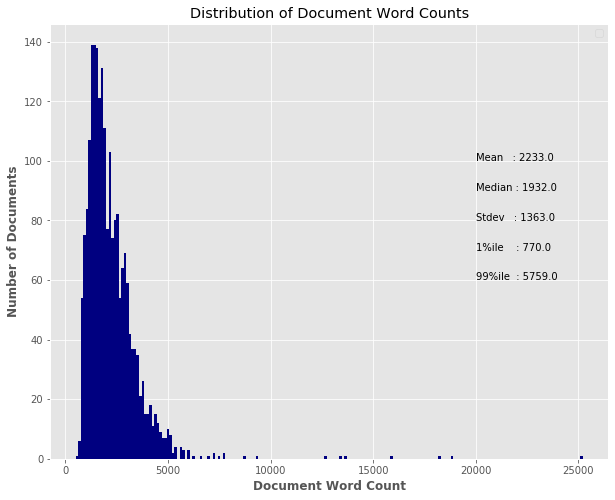

In [139]:
# plot the training and validation loss
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.hist(doc_lens, bins = 200, color='navy')
plt.text(20000, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(20000,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(20000,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(20000,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(20000,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))
plt.title("Distribution of Document Word Counts")
plt.xlabel("Document Word Count", weight="bold")
plt.ylabel("Number of Documents", weight="bold")
plt.legend()
plt.show()

When working with a large number of documents, you want to know how big the documents are as a whole and by topic. Let’s plot the document word counts distribution.

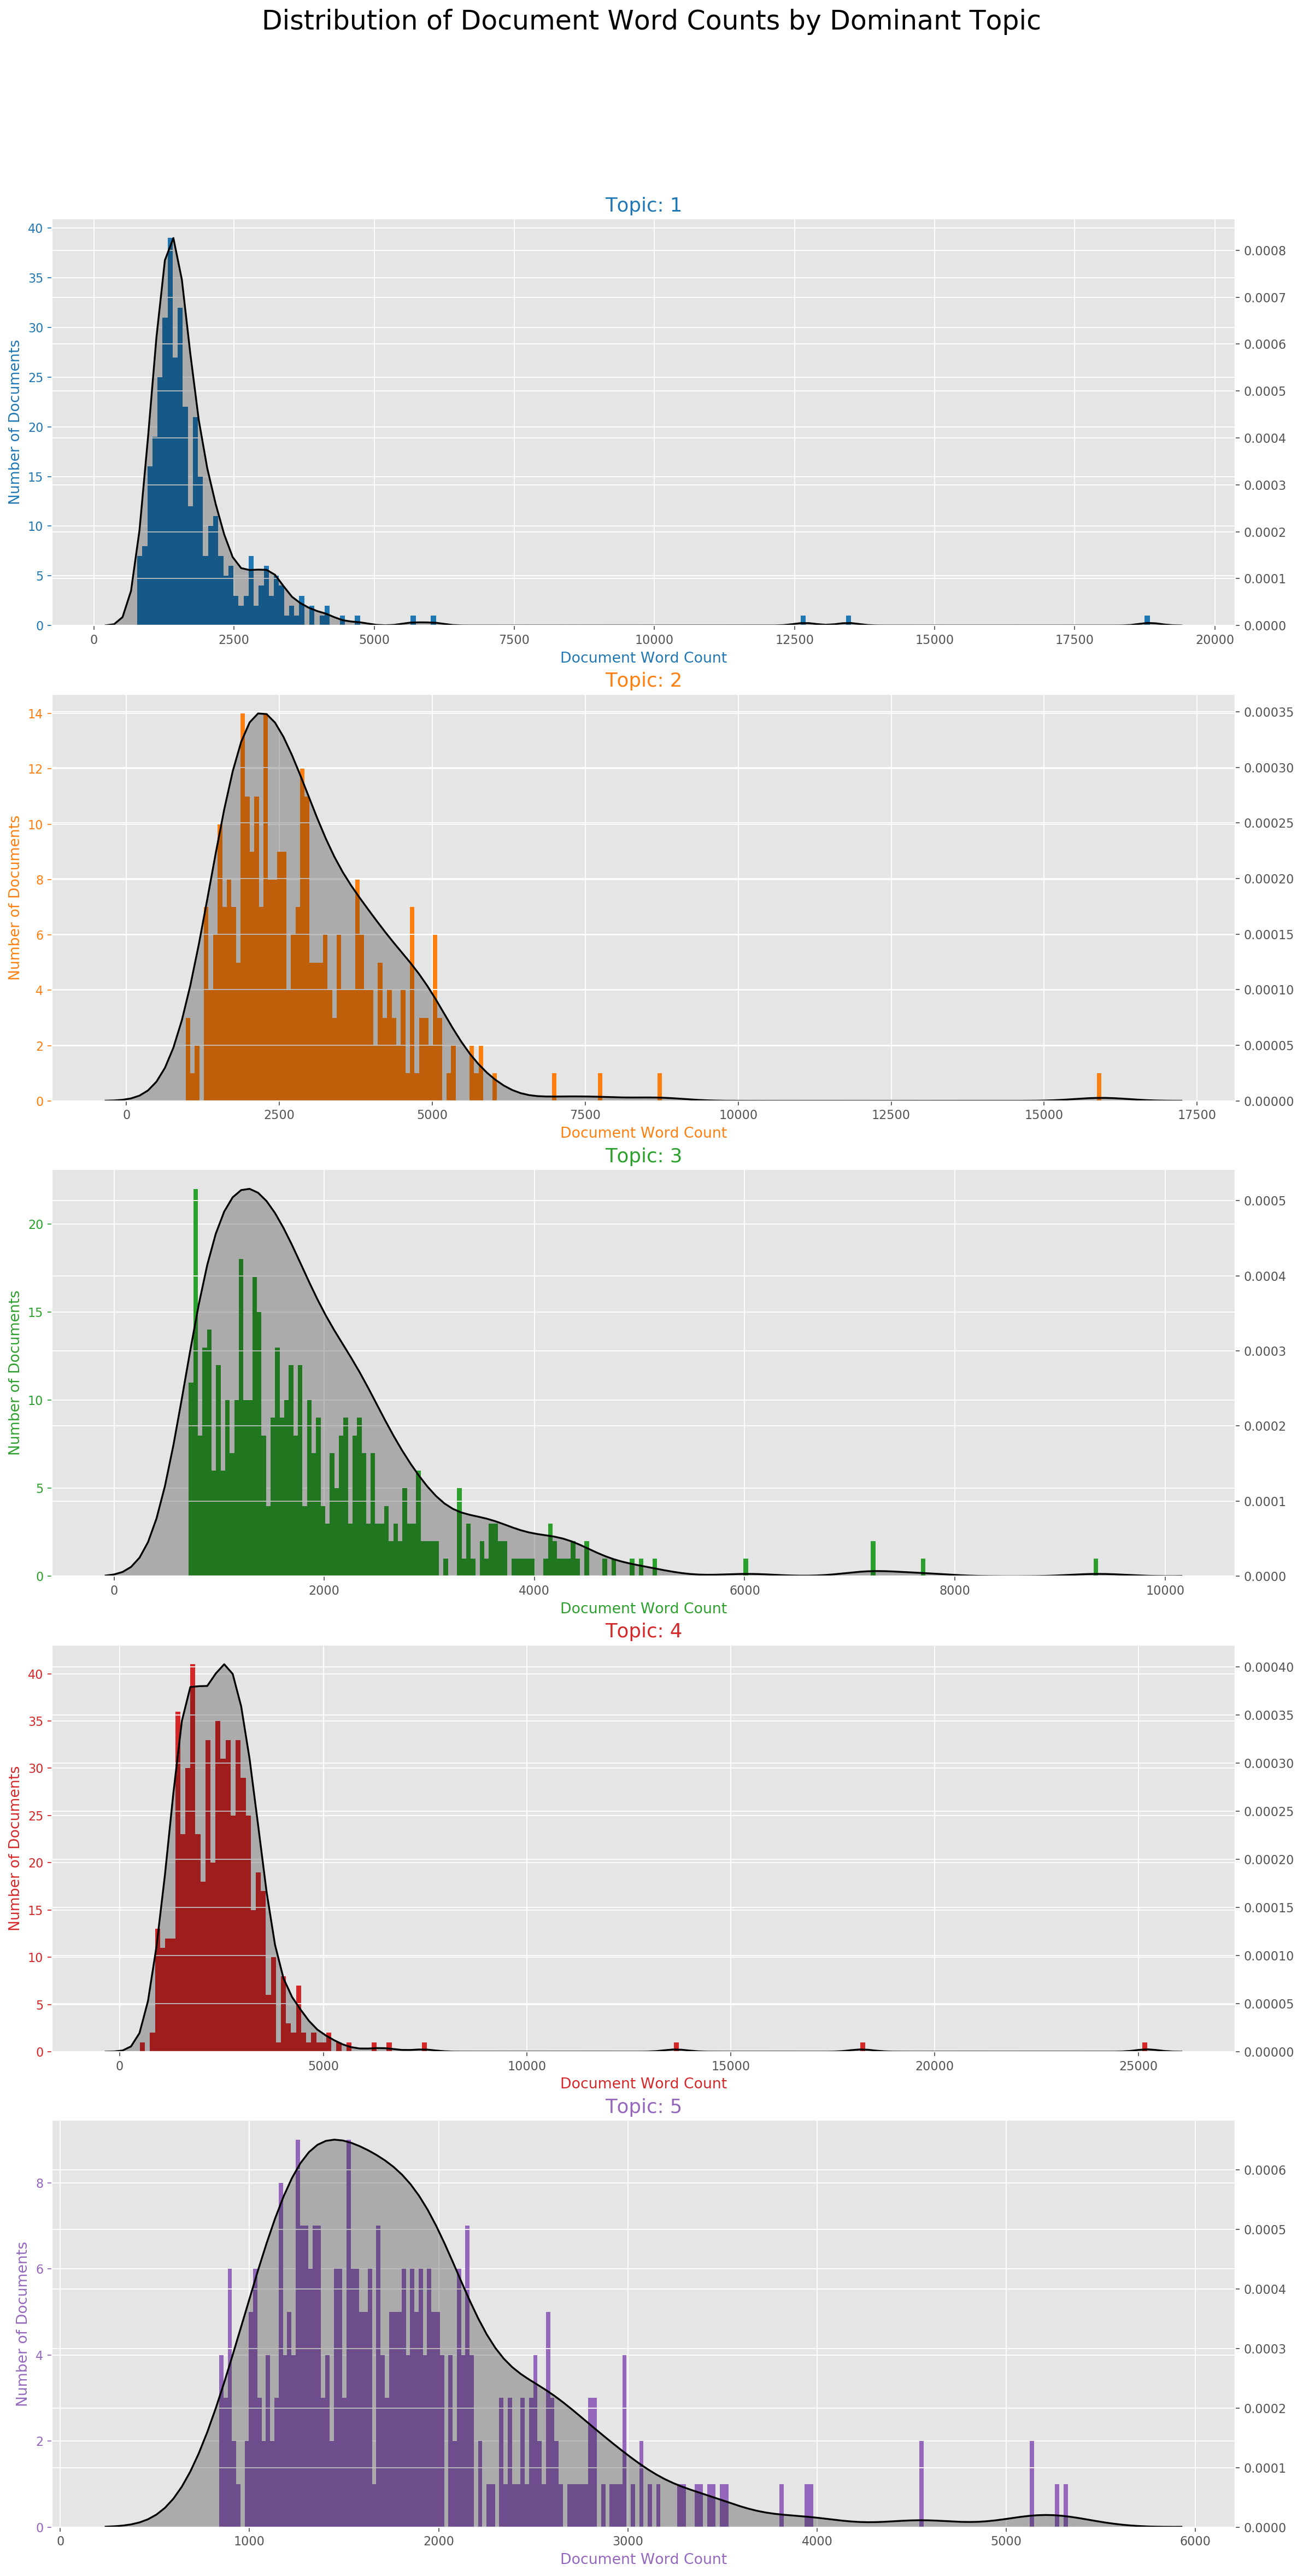

In [155]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(5,1,figsize=(15,30), dpi=160, sharex=False, sharey=False)
plt.style.use("ggplot")
for i, ax in enumerate(axes.flatten()):    
    
    # select first topic all records 
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic_No == i, :]
    
    # cal len of the text 
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    
    
    ax.hist(doc_lens, bins = 200, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=True, ax=ax.twinx())
    ax.set_xlabel('Document Word Count', color=cols[i])
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i+1), fontdict=dict(size=16, color=cols[i]))


fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

# Word Clouds of Top N Keywords in Each Topic

 word cloud with the size of the words proportional to the weight is a pleasant sight.

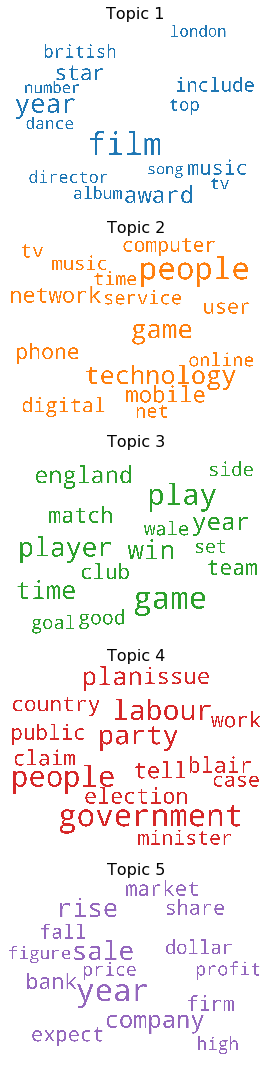

In [171]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

Total_words = 15

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=Total_words,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model.show_topics(formatted=False,num_words=Total_words)

fig, axes = plt.subplots(5, 1, figsize=(30,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0.9, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Word Counts of Topic Keywords

When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.
Let’s plot the word counts and the weights of each keyword in the same chart.

You want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight. Often such words turn out to be less important. The chart I’ve drawn below is a result of adding several such words to the stop words list in the beginning and re-running the training process.

In [181]:
from collections import Counter
Total_words = 15
topics = optimal_model.show_topics(formatted=False,num_words=Total_words)
data_flat = [w for w_list in data_lemmatized for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
df.head(10)

,word,topic_id,importance,word_count
0,film,0,0.017424,1056
1,year,0,0.012131,3045
2,award,0,0.009584,575
3,star,0,0.007904,498
4,music,0,0.007097,753
5,include,0,0.006285,809
6,british,0,0.005271,523
7,top,0,0.005133,591
8,director,0,0.004858,445
9,album,0,0.004695,210


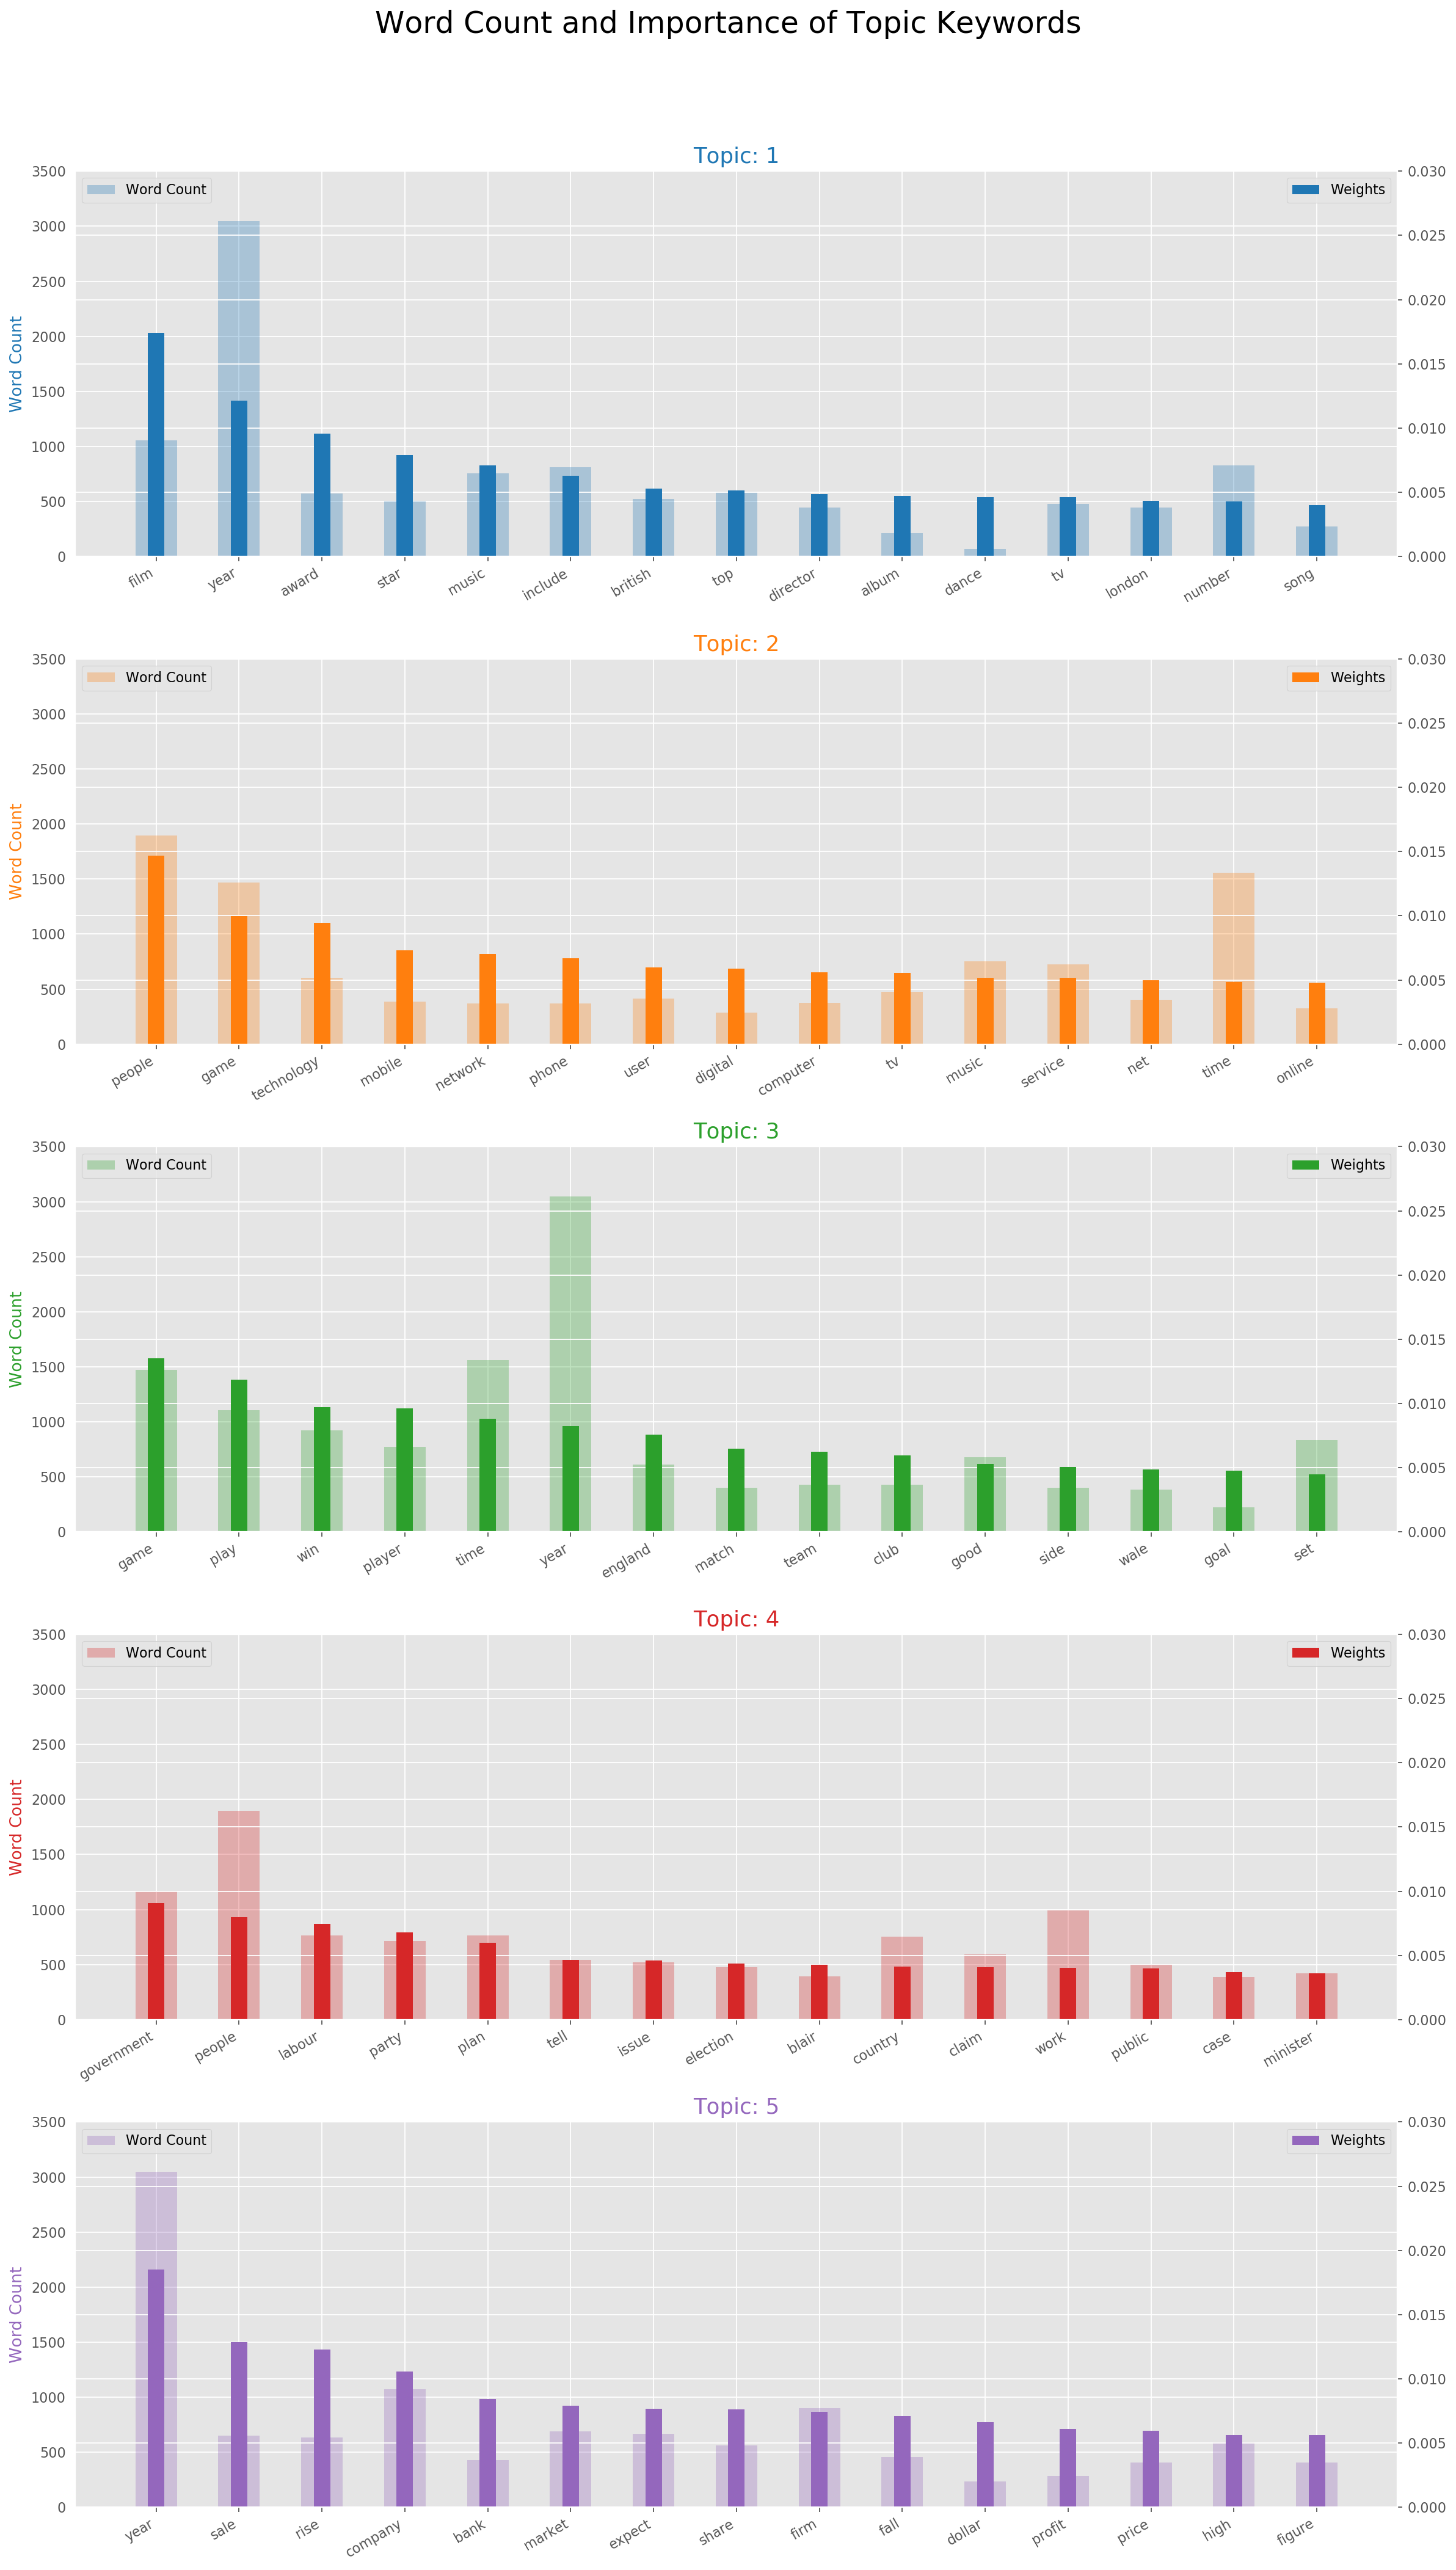

In [186]:
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 1, figsize=(15,25), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i+1), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

### Sentence Chart Colored by Topic


Each word in the document is representative of one of the 5 topics. Let’s color each word in the given documents by the topic id it is attributed to.
The color of the enclosing rectangle is the topic assigned to the document.

In [207]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=optimal_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

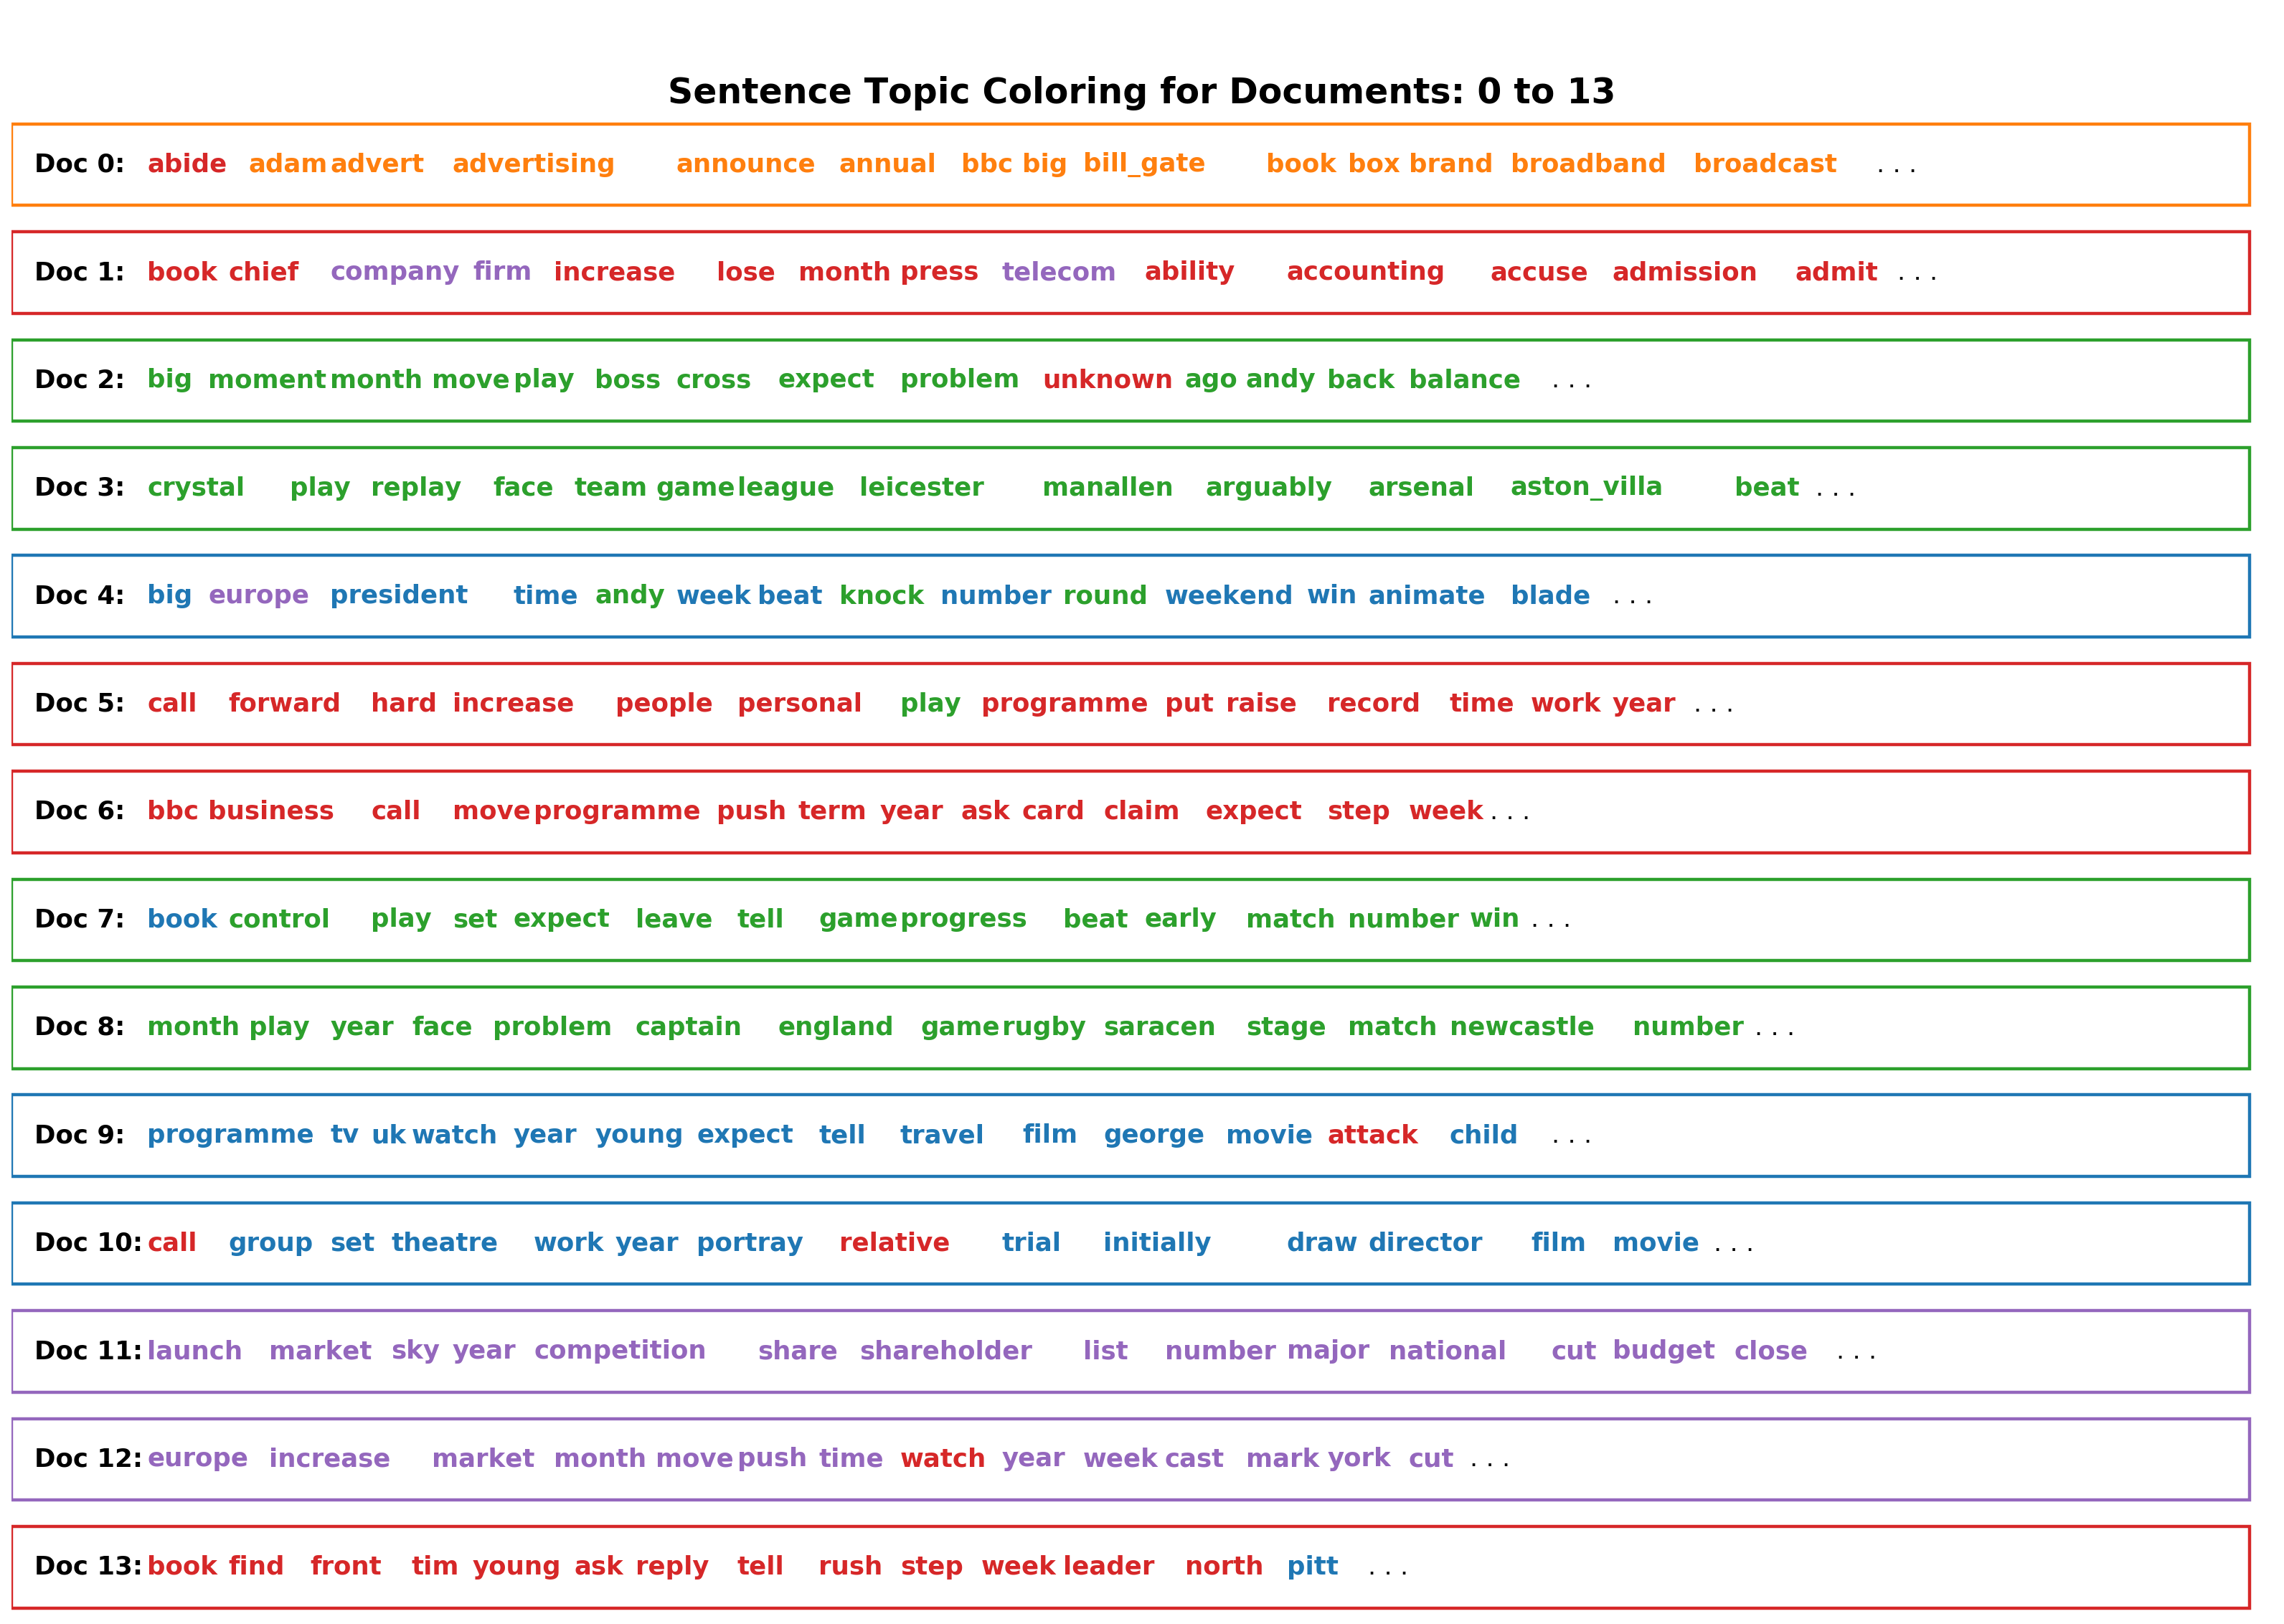

In [208]:
sentences_chart(lda_model=optimal_model, corpus=corpus, start = 0, end = 15)    

 ### What are the most discussed topics in the documents?

compute the total number of documents attributed to each topic.

In [199]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=optimal_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in optimal_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 4]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

Let’s make two plots:

1. The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
2. The number of documents for each topic by by summing up the actual weight contribution of each topic to respective documents.

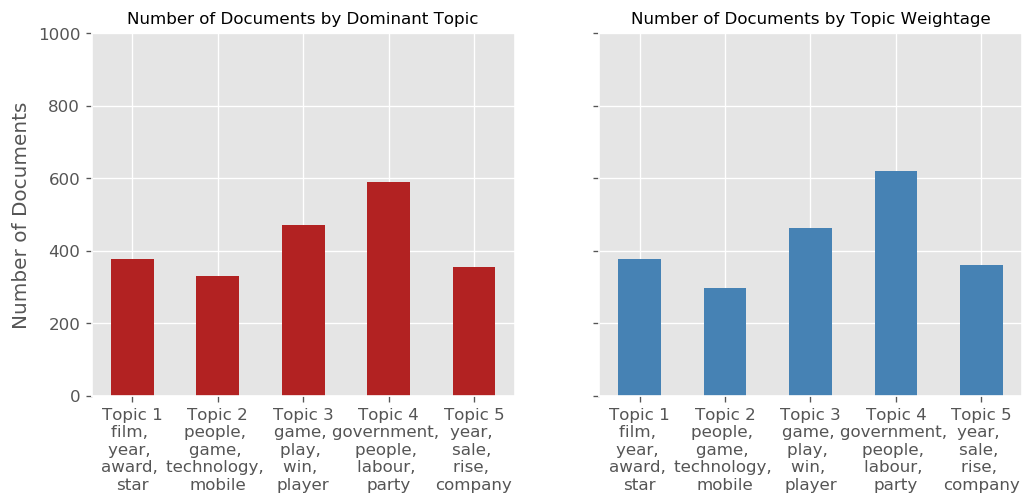

In [201]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x+1)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

### t-SNE Clustering Chart

Let’s visualize the clusters of documents in a 2D space using t-SNE (t-distributed stochastic neighbor embedding) algorithm.

In [202]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(optimal_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2114 samples in 0.011s...
[t-SNE] Computed neighbors for 2114 samples in 0.076s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2114
[t-SNE] Computed conditional probabilities for sample 2000 / 2114
[t-SNE] Computed conditional probabilities for sample 2114 / 2114
[t-SNE] Mean sigma: 0.019718
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.356491
[t-SNE] KL divergence after 1000 iterations: 0.552485


Loading BokehJS ...

### pyLDAVis

Finally, pyLDAVis is the most commonly used and a nice way to visualise the information contained in a topic model. Below is the implementation for LdaModel()

In [204]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, dictionary=optimal_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.077802  0.008863       1        1  31.118504
2     -0.113214  0.220358       2        1  18.948864
1      0.058759 -0.176172       3        1  17.823774
0     -0.230957 -0.104028       4        1  16.650296
4      0.207610  0.050980       5        1  15.458562, topic_info=                   Term         Freq        Total Category  logprob  loglift
476                film  1097.000000  1097.000000  Default  30.0000  30.0000
289                game  1475.000000  1475.000000  Default  29.0000  29.0000
890                rise   707.000000   707.000000  Default  28.0000  28.0000
762                sale   784.000000   784.000000  Default  27.0000  27.0000
116              people  1887.000000  1887.000000  Default  26.0000  26.0000
161          technology   574.000000   574.000000  Default  25.0000  25.0000
832               award   543.000000   543.000000  Default  24.0000  24.0000
30              company   891.000000   891.000000  Default  23.0000  23.0000
185                year  2753.000000  2753.000000  Default  22.0000  22.0000
606              labour   789.000000   789.000000  Default  21.0000  21.0000
120                play  1036.000000  1036.000000  Default  20.0000  20.0000
1093             player   768.000000   768.000000  Default  19.0000  19.0000
594          government  1043.000000  1043.000000  Default  18.0000  18.0000
1123               bank   445.000000   445.000000  Default  17.0000  17.0000
443                 win   847.000000   847.000000  Default  16.0000  16.0000
620               party   720.000000   720.000000  Default  15.0000  15.0000
876               music   714.000000   714.000000  Default  14.0000  14.0000
104              mobile   444.000000   444.000000  Default  13.0000  13.0000
101              market   591.000000   591.000000  Default  12.0000  12.0000
523                star   507.000000   507.000000  Default  11.0000  11.0000
285             england   563.000000   563.000000  Default  10.0000  10.0000
388               match   419.000000   419.000000  Default   9.0000   9.0000
110             network   443.000000   443.000000  Default   8.0000   8.0000
244               phone   415.000000   415.000000  Default   7.0000   7.0000
57                 firm   720.000000   720.000000  Default   6.0000   6.0000
256               share   500.000000   500.000000  Default   5.0000   5.0000
967              dollar   350.000000   350.000000  Default   4.0000   4.0000
171                  tv   598.000000   598.000000  Default   3.0000   3.0000
1434               user   362.000000   362.000000  Default   2.0000   2.0000
280                club   393.000000   393.000000  Default   1.0000   1.0000
606              labour   788.460712   789.238176   Topic1  -4.8995   1.1664
583            election   461.697956   462.474024   Topic1  -5.4347   1.1657
554               blair   453.933226   454.709268   Topic1  -5.4517   1.1657
558                case   390.077799   390.876842   Topic1  -5.6033   1.1653
1817                law   371.131275   371.910157   Topic1  -5.6531   1.1653
660                tory   306.194093   306.966756   Topic1  -5.8454   1.1648
620               party   718.616726   720.458524   Topic1  -4.9923   1.1648
1022       conservative   229.211981   229.987633   Topic1  -6.1350   1.1640
646           secretary   215.892133   216.668972   Topic1  -6.1948   1.1638
687      prime_minister   204.213348   204.991498   Topic1  -6.2505   1.1636
632            proposal   202.553569   203.330409   Topic1  -6.2586   1.1635
628           political   199.167148   199.950515   Topic1  -6.2755   1.1634
4076               iraq   174.933247   175.718151   Topic1  -6.4052   1.1629
2696            lib_dem   170.207865   170.980573   Topic1  -6.4326   1.1628
189              accuse   167.416051   168.199786   Topic1  -6.4491   1.1627
601              howard   165.454576 